**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Aula 03:** Apresentação da Biblioteca Pytorch e Regressão Logística

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/notebooks/aula03_pytorch_intro.ipynb)

# Objetivo da Aula

Queremos criar um oráculo e já fizemos progressos entendendo a noção de descida do gradiente. A descida do gradiente permite encontrar valores dos parâmetros de maneira mais eficiente do que uma busca exaustiva. Entretanto, muita coisa ainda pode ser melhorada na maneira como estamos escrevendo os nossos códigos, mas devemos realizar essas melhorias passo a passo. 

Na aula de hoje, vamos tentar escrever códigos mais eficientes usando uma biblioteca do python que nos permitirá tratar as estruturas de dados em memória de maneira mais eficiente. Posteriormente, na próxima aula, veremos que esta biblioteca ainda poderá nos ajudar computando o gradiente por nós. 

# PyTorch

O PyTorch é uma biblioteca de aprendizado de máquina de código aberto usada em aprendizado de máquina, com grande suporte a *deep learning*. Essa biblioteca foi desenvolvida pelo laboratório de pesquisa de IA do Facebook. Uma das vantagens é que o PyTorch permite utilizar programação orientada a objetos para definição de arquiteturas.

Vamos hoje conhecer um pouco mais o PyTorch e usá-lo para reescrever o que já conhecemos de aulas anteriores. Ao final da aula, vamos tentar expandir os nossos conhecimentos com um vislumbre de redes neurais.

# Tensores 

Os tensores são uma estrutura de dados muito semelhantes a arrays e matrizes. No contexto de aprendizado de máquina, tensores são uma generalização de arrays e matrizes para um número arbitrário de dimensões. 

Em PyTorch, usamos tensores para codificar as entradas e saídas de um modelo, assim como os parâmetros do modelo. Em outras palavras, os tensores vão unificar a organização de todos os dados que usaremos de agora em diante.

Os tensores podem executar em GPUs ou outros aceleradores de hardware.  Tensores também são otimizados para diferenciação automática. Vamos começar importando a biblioteca.

In [1]:
import torch

**Inicialização de Tensores**

Os tensores podem ser inicializados de várias maneiras. Eles podem armazenar números em ponto flutuante de maneira organizada para as redes neurais lidarem com a informação.

Em essência, uma lista convencional de python organiza os dados na memória de uma forma em que cada elemento possui o seu próprio endereço. Os tensores do PyTorch organizam os dados de maneira contígua, o que garante um aumento de eficiência.

Dê uma olhada nos seguintes exemplos:

In [2]:
# Criando um simples escalar
scalar = torch.tensor(10)
scalar

tensor(10)

In [3]:
# Vendo o numero de dimensões, como
# temos um escalar, o número de
# dimensões é zero
scalar.ndim

0

In [4]:
# Inicializando uma lista de tamanho 3 aleatoriamente entre 0 e 1
vector = torch.rand(3)
vector

tensor([0.4839, 0.1763, 0.3248])

In [5]:
# Um vetor é unidimensional
vector.ndim

1

In [6]:
# Inicializando aleatoriamente em uma distribuição normal
vector = torch.normal(mean = 0, std = torch.tensor([1.0]))
vector

tensor([1.2593])

In [7]:
# Inicializando dados com mais dimensões:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [8]:
# Número de dimensões dessa matriz
x_data.ndim

2

In [9]:
# Podemos ver o número de elementos dentro de tensor
x_data.numel()

4

**Operações Aritméticas com Tensores**

De posse de um tensor, podemos executar várias operações matemáticas com os elementos dentro dele. Observe que as operações a seguir não precisam de um laço de repetição, como seria o caso se tivéssemos armazenado os dados com a lista padrão do python.

In [10]:
x_data + 2

tensor([[3, 4],
        [5, 6]])

In [11]:
x_data - 2

tensor([[-1,  0],
        [ 1,  2]])

In [12]:
x_data * 2

tensor([[2, 4],
        [6, 8]])

In [13]:
x_data / 2

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

In [14]:
x_data // 2 ## Divisão Inteira

tensor([[0, 1],
        [1, 2]])

In [15]:
x_data % 2 ## Resto da divisão

tensor([[1, 0],
        [1, 0]])

In [16]:
x_data ** 2 ## Potência

tensor([[ 1,  4],
        [ 9, 16]])

In [17]:
2 ** x_data ## Exponenciação

tensor([[ 2,  4],
        [ 8, 16]])

In [18]:
x_data * x_data

tensor([[ 1,  4],
        [ 9, 16]])

In [19]:
x_data / x_data

tensor([[1., 1.],
        [1., 1.]])

**Exercício**

Vamos dar uma pausa para resolver o seguinte exercício. Vamos supor que temos um vetor chamado de y com valores 0 ou 1. Além disso, temos um vetor chamado de y_pred com valores reais no intervalo entre 0 e 1. Da seguinte forma:

In [20]:
y = torch.tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1.])

y_pred = torch.tensor([0.99,0.01,0.98,0.12,0.99,0.01,0.99,0.99,0.01,0.99,0.01,
        0.99,0.99,0.01,0.99,0.01,0.12,0.99,0.01,0.99,0.01,0.01,0.99,0.82,0.98,
        0.99,0.01,0.99,0.99,0.99,0.97,0.99,0.50,0.99,0.98,0.01,0.01,0.99,0.03,
        0.99,0.99,0.02,0.99,0.02,0.97,0.99,0.27,0.01,0.99,0.03,0.99,0.99,0.01,
        0.99,0.01,0.99,0.92,0.27,0.99,0.99,0.03,0.99,0.01,0.99,0.05,0.99,0.99,
        0.99,0.38,0.97,0.99,0.01,0.99,0.92,0.12,0.99,0.05,0.99,0.99,0.99,0.99,
        0.99,0.88,0.38,0.97,0.99,0.99,0.99,0.01,0.99,0.05,0.99,0.01,0.99,0.18,
        0.95,0.99,0.99,0.01,0.99,0.12,0.99,0.01,0.99,0.99,0.01,0.99,0.01,0.99,
        0.99,0.99,0.03,0.99,0.99,0.03,0.99,0.01,0.99,0.03,0.99,0.01,0.82,0.99,
        0.01,0.99,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,0.99,0.01,
        0.99,0.01,0.99,0.99,0.05,0.99,0.99,0.99,0.03,0.99,0.01,0.99,0.01,0.99,
        0.99,0.38,0.99,0.92,0.88,0.99,0.99,0.01,0.99,0.01,0.99,0.02,0.99,0.50,
        0.99,0.18,0.99,0.01,0.99,0.01,0.01,0.99,0.73,0.99,0.99,0.97,0.01,0.99,
        0.98,0.01,0.99,0.99,0.99,0.01,0.99,0.99,0.01,0.99,0.01,0.99,0.01,0.99,
        0.99,0.99,0.99,0.99,0.99,0.01,0.99,0.05,0.99,0.99,0.01,0.99,0.01,0.99,
        0.99,0.01,0.99,0.92,0.99,0.01,0.99,0.27,0.99,0.01,0.99,0.01,0.99,0.01,
        0.99,0.01,0.99,0.99,0.99,0.99,0.99,0.88,0.99,0.88,0.01,0.99,0.01,0.99,
        0.01,0.01,0.99,0.99,0.27,0.99,0.01,0.99,0.18,0.99,0.99,0.01,0.99,0.62,
        0.98,0.01,0.99,0.97,0.97,0.99,0.99,0.92,0.99,0.01,0.99,0.99,0.99,0.02,
        0.99,0.01,0.05,0.99,0.99,0.01,0.99,0.01,0.98])

        
y.shape, y_pred.shape

(torch.Size([272]), torch.Size([272]))

Agora crie uma função que implementa *erro quadrático médio* aprendido em aulas anteriores com essas estruturas.

In [21]:
#ToDo: Implemente a função abaixo
def erro_quadratico_medio(y_pred, y) :
    return 1

def erro_quadratico_medio(y_pred, y) :
    return ((y_pred - y)**2).sum()/272

erro_quadratico_medio(y_pred, y)

tensor(0.0307)

Vale mencionar que esta função já está implementada na biblioteca PyTorch. Nesse caso, o seu valor deverá ser igual ao visto a seguir:

In [22]:
loss_fn = torch.nn.MSELoss()
loss_fn(y_pred, y).item()

0.03068603202700615

In [23]:
-(1/len(y)) * sum(y*y_pred.log() + (1 - y)*((1-y_pred).log()))

tensor(0.1270)

Uma outra função interessante de se programar é a função de custo conhecida como *entropia cruzada binária*, cuja fórmula é:
$$ -\frac{1}{n} \sum_{i=1}^n  [ y_i \log(\hat y_i) + (1-y_i)  \log(1-\hat y_i) ]$$ 


In [24]:
# ToDo: Implemente esta função abaixo.
def entropia_cruzada_binaria(y_pred, y) :
    return 1

def entropia_cruzada_binaria(y_pred, y) :
    return -(1/len(y))* torch.sum(y*torch.log(y_pred) + (1 - y)* torch.log(1-y_pred))

entropia_cruzada_binaria(y_pred, y)

tensor(0.1270)

Vale também mencionar que esta função já está implementada na biblioteca PyTorch. Nesse caso, o seu valor deverá ser igual ao visto a seguir:

In [25]:
loss_fn = torch.nn.BCELoss()
loss_fn(y_pred, y).item()

0.12697304785251617

**Operações de Comparação com Tensores**

A seguir, um conjunto de operações de comparação que permitem gerar tensores binários.

In [26]:
x_data > 2

tensor([[False, False],
        [ True,  True]])

In [27]:
x_data != 3

tensor([[ True,  True],
        [False,  True]])

In [28]:
1 < x_data

tensor([[False,  True],
        [ True,  True]])

In [29]:
x_data == 3

tensor([[False, False],
        [ True, False]])

In [30]:
x_data ** 2 > 10

tensor([[False, False],
        [False,  True]])

In [31]:
2 ** (x_data < 4)

tensor([[2, 2],
        [2, 1]])

**Operações booleanas com Tensores**

In [32]:
a = torch.Tensor([True, False, True, False])
b = torch.Tensor([True, True, False, False])

In [33]:
torch.logical_and(a, b)

tensor([ True, False, False, False])

In [34]:
torch.logical_or(a, b)

tensor([ True,  True,  True, False])

In [35]:
torch.logical_not(a)

tensor([False,  True, False,  True])

**Exercício**

Vamos dar uma segunda pausa para que você possa usar os vetores $y$ e $\hat y$ novamente. Escreva uma função que retorne um vetor de booleanos em que cada posição $i$ desse vetor deve ser preenchida da seguinte forma:

* **True**: se $y_i$ e $\hat y_i$ forem ambos maiores que 0.5
* **True**: se $y_i$ e $\hat y_i$ forem ambos menores ou iguais a 0.5
* **False**: qualquer outra situação.

In [36]:
# ToDo: Implemente a função a seguir
def right_predictions(y_pred, y) :
    return 1

def right_predictions(y_pred, y) :
    y_one      = y > 0.5
    y_pred_one = y_pred > 0.5

    both_one  = torch.logical_and(y_one, y_pred_one)
    both_zero = torch.logical_and(torch.logical_not(y_one), torch.logical_not(y_pred_one)) 
    return torch.logical_or(both_one, both_zero)

right_predictions(y_pred, y)

tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

Compare sua resposta com o resultado a seguir:

In [37]:
answer = torch.tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])
answer

tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

**Outras Inicializações de Tensores**

In [38]:
# Inicializando uma matriz identidade 3 x 3
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [39]:
# Inicializando uma matriz identidade 5 x 5
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [40]:
# Criando um intervalo linear entre 2 e 10
# com 25 elementos
torch.linspace(2, 10, steps = 25)

tensor([ 2.0000,  2.3333,  2.6667,  3.0000,  3.3333,  3.6667,  4.0000,  4.3333,
         4.6667,  5.0000,  5.3333,  5.6667,  6.0000,  6.3333,  6.6667,  7.0000,
         7.3333,  7.6667,  8.0000,  8.3333,  8.6667,  9.0000,  9.3333,  9.6667,
        10.0000])

In [41]:
# Criando um intervalo logarítmico entre 10^2 e 10^10
# com 25 elementos
torch.logspace(2, 10, steps = 25)

tensor([1.0000e+02, 2.1544e+02, 4.6416e+02, 1.0000e+03, 2.1544e+03, 4.6416e+03,
        1.0000e+04, 2.1544e+04, 4.6416e+04, 1.0000e+05, 2.1544e+05, 4.6416e+05,
        1.0000e+06, 2.1544e+06, 4.6416e+06, 1.0000e+07, 2.1544e+07, 4.6416e+07,
        1.0000e+08, 2.1544e+08, 4.6416e+08, 1.0000e+09, 2.1544e+09, 4.6416e+09,
        1.0000e+10])

In [42]:
# Com valores aleatórios ou constantes:

# Shape é um tuple de dimensões tensoriais. Nas 
# funções abaixo, determinamos  a dimensionalidade 
# do tensor que criamos.

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9195, 0.5177, 0.4891],
        [0.6599, 0.7927, 0.7347]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [43]:
# Inicializando de outro Tensor:
##  O novo tensor retém as propriedades (forma, tipo de dados) 
##  do tensor do argumento, a menos que seja explicitamente anulado.

x_ones = torch.ones_like(x_data) # mantém a propriedade de x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # muda as propriedades x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9502, 0.0707],
        [0.4945, 0.4956]]) 



**Mínimos e Máximos**

In [44]:
# Encontrando o mínimo
d = torch.randn(4,5)
d

tensor([[-0.7410,  0.4756, -0.5688,  0.2066, -1.3234],
        [ 0.2907,  0.4882, -1.3896, -0.2206,  1.6478],
        [-0.1673, -0.3637, -1.4141, -1.6007,  2.1516],
        [-0.9489, -0.7565, -0.0127,  0.9623,  0.2407]])

In [45]:
## Argmin devolve os índices dos mínimos de uma dada dimensão
## Por exemplo, para a dimensão das linhas
d.argmin(dim=0)

tensor([3, 3, 2, 2, 0])

In [46]:
## Argmin devolve os índices dos mínimos de uma dada dimensão
## Por exemplo, para a dimensão das colunas
d.argmin(dim=1)

tensor([4, 2, 3, 0])

**Atributos de Tensores**

In [47]:
tensor = torch.rand(3,4)

print(f"Shape (formato) do Tensor: {tensor.shape}")
print(f"Datatype (tipo de dado) do Tensor: {tensor.dtype}")
print(f"Device onde o tensor está armazenado: {tensor.device}")

Shape (formato) do Tensor: torch.Size([3, 4])
Datatype (tipo de dado) do Tensor: torch.float32
Device onde o tensor está armazenado: cpu


**Operações avançadas com Tensores**

Em PyTorch temos mais de 100 operações tensoriais, incluindo aritmética, álgebra linear, manipulação de matrizes (transposição,
indexação, fatiamento), amostragem e muito mais. Para mais operações interessantes sugiro procurar [aqui](https://pytorch.org/docs/stable/torch.html).

Cada uma destas operações pode ser executada na GPU (em velocidades tipicamente mais altas do que em uma 
CPU). No Colab, alocar uma GPU é feito indo em Runtime > Change runtime type > GPU.

Por padrão, os tensores são criados na CPU. Precisamos mover explicitamente os tensores para a GPU usando
método ``.to'' (depois de verificar a disponibilidade da GPU). Tenha em mente que a cópia de grandes tensores
através de dispositivos pode ser caro em termos de tempo e memória!

In [48]:
# Movemos nosso tensor para a GPU, se disponível
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [49]:
## Indexação e Slices
tensor = torch.ones(4, 4)
print(f"Tensor: {tensor}")
print(f"Primeira Linha: {tensor[0]}")
print(f"Primeira coluna: {tensor[:, 0]}")
print(f"Última column: {tensor[:, -1]}")

Tensor: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Primeira Linha: tensor([1., 1., 1., 1.])
Primeira coluna: tensor([1., 1., 1., 1.])
Última column: tensor([1., 1., 1., 1.])


In [50]:
## Alterando última coluna de todas as linhas
tensor[:,-1] = 0
print(tensor)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])


**Unindo tensores**

 Você pode utilizar ``torch.cat``` para concatenar uma seqüência de tensores ao longo de uma dada dimensão.


In [51]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])


In [52]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.]])


**Transposta de um Tensor**

In [53]:
tensor.T

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.]])

**Multiplicação de Tensores**

In [54]:
tensor.matmul(tensor)

tensor([[3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.]])

In [55]:
tensor @ tensor

tensor([[3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.],
        [3., 3., 3., 0.]])

In [56]:
tensor

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

**Produto de Tensores (elemento a elemento)

In [57]:
tensor * tensor

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

In [58]:
tensor.mul(tensor)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

**Conversão de Tensores para Python**

Se você tiver um tensor de um elemento, você pode convertê-lo em um valor numérico padrão do Python
 utilizando ``item()``:

In [59]:
agg = tensor.sum()
agg

tensor(12.)

In [60]:
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


Se você tiver um tensor de vários elemento, você pode convertê-lo em uma lista padrão do Python
 utilizando ``tolist()``:

In [61]:
python_list = tensor.tolist()
print(python_list, type(python_list))

[[1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0], [1.0, 1.0, 1.0, 0.0]] <class 'list'>


# Descida do Gradiente com PyTorch

No seu núcleo, PyTorch fornece diferenciação automática para a construção e formação de redes neurais. Assim, quando a função que queremos adequar aos nossos dados fica muito complexa, como é o caso de uma rede neural, não será fácil gerar código manual para efetuar os cálculos. O PyTorch fornece a diferenciação automática (autograd) para que não tenhamos que nos preocupar com as derivadas.

Para usar a diferenciação automática, devemos nos preocupar com dois conceitos, que já conhecemos, apenas não demos nomes para eles:

1. **forward pass**: o ato de computar o resultado da função que queremos ajustar aos dados. Por exemplo, dados valores para $a$, $b$, $c$ e $d$ de uma função $f_{deg3}(x) = dx^3+ cx^2 + bx+a$, computar o valor $f_{deg3}(x)$ para um $x$ qualquer seria um forward pass.

2. **backward pass**: o ato de computar as derivadas parciais para os coeficientes, dado que temos o gradiente da saída da função. Isso permite que os pesos sejam atualizados, como vimos anteriormente.

Vamos introduz os conceitos fundamentais da PyTorch com a função do terceiro grau. Futuramente, vamos voltar ao PyTorch e tentar simplificar algumas coisas. O propósito inicial é se habituar com os códigos e depois as coisas ficarão mais fáceis de entender. 

A seguir, criaremos código do modo como um programador mais experiente em PyTorch faria.

**Processando a entrada**

A entrada das nossas funções tem sido o valor de $x$. Por eficiência, vamos criar para cada entrada um novo vetor contendo $x, x^2 e x^3$, o que nos permitirá multiplicar com os coeficientes a, b, c e d

In [62]:
import pandas as pd
import torch
import matplotlib.pyplot as plt


###############################################
# Banco de Dados: Old Faithful
#
# Descrição
# Tempo de espera entre as erupções e a duração 
# da erupção do gêiser Old Faithful no Parque 
# Nacional de Yellowstone, Wyoming, EUA.
# 
# Formato
# Um DataFrame com 272 observações em 2 variáveis.
# 
# [,1]	eruptions	numeric	 Tempo de Erupção em minutos
# [,2]	waiting	numeric	 Tempo de espera para a 
#                        próxima erupção (em minutos)
###############################################

faithful = pd.read_csv("data/faithful.csv", index_col = 0)
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [63]:
## Utilizando os tensores do PyTorch

y = torch.tensor(faithful.eruptions.values, dtype = torch.float)
x = torch.tensor(faithful.waiting.values, dtype = torch.float)

In [64]:
print(x.shape)
print(x)

torch.Size([272])
tensor([79., 54., 74., 62., 85., 55., 88., 85., 51., 85., 54., 84., 78., 47.,
        83., 52., 62., 84., 52., 79., 51., 47., 78., 69., 74., 83., 55., 76.,
        78., 79., 73., 77., 66., 80., 74., 52., 48., 80., 59., 90., 80., 58.,
        84., 58., 73., 83., 64., 53., 82., 59., 75., 90., 54., 80., 54., 83.,
        71., 64., 77., 81., 59., 84., 48., 82., 60., 92., 78., 78., 65., 73.,
        82., 56., 79., 71., 62., 76., 60., 78., 76., 83., 75., 82., 70., 65.,
        73., 88., 76., 80., 48., 86., 60., 90., 50., 78., 63., 72., 84., 75.,
        51., 82., 62., 88., 49., 83., 81., 47., 84., 52., 86., 81., 75., 59.,
        89., 79., 59., 81., 50., 85., 59., 87., 53., 69., 77., 56., 88., 81.,
        45., 82., 55., 90., 45., 83., 56., 89., 46., 82., 51., 86., 53., 79.,
        81., 60., 82., 77., 76., 59., 80., 49., 96., 53., 77., 77., 65., 81.,
        71., 70., 81., 93., 53., 89., 45., 86., 58., 78., 66., 76., 63., 88.,
        52., 93., 49., 57., 77., 68., 81., 81.

In [65]:
## Vamos primeiramente adicionar uma dimensão no vetor
xx = x.unsqueeze(-1)
print(xx.shape)
print(xx)

torch.Size([272, 1])
tensor([[79.],
        [54.],
        [74.],
        [62.],
        [85.],
        [55.],
        [88.],
        [85.],
        [51.],
        [85.],
        [54.],
        [84.],
        [78.],
        [47.],
        [83.],
        [52.],
        [62.],
        [84.],
        [52.],
        [79.],
        [51.],
        [47.],
        [78.],
        [69.],
        [74.],
        [83.],
        [55.],
        [76.],
        [78.],
        [79.],
        [73.],
        [77.],
        [66.],
        [80.],
        [74.],
        [52.],
        [48.],
        [80.],
        [59.],
        [90.],
        [80.],
        [58.],
        [84.],
        [58.],
        [73.],
        [83.],
        [64.],
        [53.],
        [82.],
        [59.],
        [75.],
        [90.],
        [54.],
        [80.],
        [54.],
        [83.],
        [71.],
        [64.],
        [77.],
        [81.],
        [59.],
        [84.],
        [48.],
        [82.],
        [60.],
    

In [66]:
## Criando a entrada, que contém 0, x, x^2 e x^3
p = torch.tensor([0, 1, 2, 3])
xx = xx.pow(p)
xx

tensor([[1.0000e+00, 7.9000e+01, 6.2410e+03, 4.9304e+05],
        [1.0000e+00, 5.4000e+01, 2.9160e+03, 1.5746e+05],
        [1.0000e+00, 7.4000e+01, 5.4760e+03, 4.0522e+05],
        ...,
        [1.0000e+00, 9.0000e+01, 8.1000e+03, 7.2900e+05],
        [1.0000e+00, 4.6000e+01, 2.1160e+03, 9.7336e+04],
        [1.0000e+00, 7.4000e+01, 5.4760e+03, 4.0522e+05]])

Os valores da entrada estão muito altos, o que posteriormente vai fazer com que tenhamos muito trabalho em configurar a taxa de aprendizado, dado que alguns elementos vão dominar os demais. Nesse caso, podemos sempre tentar no mínimo duas técnicas de normalização.

1. Colocar todos os números no intervalo entre zero e 1. Nesse caso, basta:
  * Subtrair todos os valores pelo valor mínimo na coluna.
  * Dividir pelo novo máximo da coluna após a subtração, o que acaba sendo igual ao antigo máximo menos o antigo mínimo.
  
2. Colocar a média em zero e o desvio padrão em 1.
  * Computar a média e o desvio padrão atual.
  * Sutrair todos os elementos pela média.
  * Dividir pelo desvio padrão atual.

Vamos tentar a primeira abordagem.

In [67]:
## Computando máximo e mínimo de cada coluna
maximo = xx.max(axis = 0).values
minimo = xx.min(axis = 0).values

# Para não dar divisão por zero na primeira 
# coluna com todos os elementos 1
minimo[0] = 0 

## Normalizando
xx = (xx - minimo)/(maximo - minimo)

xx

tensor([[1.0000, 0.6792, 0.5962, 0.5136],
        [1.0000, 0.2075, 0.1448, 0.0968],
        [1.0000, 0.5849, 0.4923, 0.4045],
        ...,
        [1.0000, 0.8868, 0.8485, 0.8066],
        [1.0000, 0.0566, 0.0362, 0.0221],
        [1.0000, 0.5849, 0.4923, 0.4045]])

**Vetor de Coeficientes**

Anteriormente, colocávamos os valores de $a$, $b$, $c$ e $d$ em variáveis. Entretanto, é mais eficiente colocar em um tensor, como a seguir.

Note que colocamos **requires_grad=True**, que significa que queremos que o gradiente seja computado em função das variáveis dentro deste vetor.

In [68]:
## As variáveis a, b, c e d estão no tensor a seguir
## inicializado ao acaso
coef = torch.rand(4, requires_grad=True)
coef

tensor([0.5212, 0.5021, 0.4072, 0.5413], requires_grad=True)

**Passo forward**

Podemos computar a função para todas as instâncias de uma só vez, sem laço de repetição, usando **torch.inner**. Produto escalar

In [69]:
forward = torch.inner(xx, coef)
forward.shape

torch.Size([272])

**Função de Erro**

O pytorch também contém definições de funções de erro populares. A que temos
usado até agora é próxima do que chamamos de "Erro Quadrático Médio". Então,
usaremos MSE como nossa função de erro.

In [70]:
loss_fn = torch.nn.MSELoss()

**Treinamento**

Vamos agora realizar o treinamento. O que você deve observar a seguir é:

In [71]:
# Configurando a taxa de aprendizado.
# Vamos deixar um valor alto como sendo
# o máximo que a taxa de aprendizado
# pode receber. Daí, vamos construir
# a taxa dentro do laço
max_learning_rate = 0.5

epochs = 1000000
for t in range(epochs):

    # Gerando taxa de aprendizado.
    learning_rate = max_learning_rate * (1 - t/epochs)
    
    # Forward pass: podemos passar a entrada para o modelo.
    y_pred = torch.inner(xx, coef)

    # Computa e imprime o erro. Passamos tensores contendo os valores preditos e
    # os valores reais e a loss retorna um tensor contendo o erro.
    loss = loss_fn(y_pred, y)
    
    ## Imprimindo dez vezes a loss
    if t % (epochs / 10) == 0 :
        print(t, loss.item())


    # Backward pass:  computar o gradiente da loss em relação a todos os
    # coeficientes a serem aprendidos no modelo.
    loss.backward()
    

    # Atualizar os pesos usando a descida por gradiente, como fizemos anteriormente.
    # Cada parâmetro é um Tensor,então podemos acessar seus gradientes como
    # fizemos antes.
    coef.data -= learning_rate * coef.grad.data
    
    # Limpamos os gradientes antes da próxima iteração
    coef.grad.data.zero_()

0 6.006956100463867


100000 0.22105756402015686
200000 0.21207670867443085
300000 0.20568186044692993
400000 0.20109258592128754
500000 0.1977861225605011
600000 0.1954183131456375
700000 0.19377362728118896
800000 0.1926954686641693
900000 0.19207023084163666


In [72]:
coef.tolist()

[1.6289076805114746, -34.14218521118164, 82.76078033447266, -45.84678268432617]

In [73]:
## Plotando os gráficos    
faithful.plot.scatter(x='waiting',
                      y='eruptions')    

# Gerando eixo_x
eixo_x = torch.tensor(range(40,100,2))

# Computando 1, x, x^2, x^3
eixo_xx = eixo_x.unsqueeze(-1)
p = torch.tensor([0, 1, 2, 3])
eixo_xx = eixo_xx.pow(p)

# Normalizando os valores do eixo_x
normal_xx = (eixo_xx - minimo)/(maximo - minimo)

## Obtendo o eixo_y para esses valores
eixo_y = torch.inner(normal_xx, coef)

## Plotando a reta    
plt.plot(eixo_x.tolist(), eixo_y.tolist(), 'r--', label='Valores Obtidos')

: 

: 

In [ ]:
eixo_y

tensor([1.6474, 1.6270, 1.6390, 1.6808, 1.7496, 1.8427, 1.9573, 2.0908, 2.2404,
        2.4033, 2.5769, 2.7583, 2.9449, 3.1339, 3.3226, 3.5083, 3.6881, 3.8595,
        4.0196, 4.1657, 4.2951, 4.4051, 4.4929, 4.5557, 4.5909, 4.5957, 4.5674,
        4.5033, 4.4005, 4.2564], grad_fn=<ViewBackward0>)

# Regressão Logística

E se o que gostaríamos de prever  são dados categóricos? Por exemplo, queremos saber se uma foto de um animação de estimação corresponde a um cachorro ou a um gato. Nesses casos, a regressão linear não é muito adequada. Por outro lado, a regressão logística (que na verdade não é uma técnica de regressão, mas de classificação) pode ser uma opção muito apropriada.

Para entender alguns conceitos de regressão logística e como ela difere da regressão, vamos gerar um novo banco de dados a partir do *old faithful* da seguinte forma. Os usuários gostariam apenas de saber se uma dada erupção iria demorar muito ou pouco, sendo que esses termos são definidos da seguinte forma:

* muito (1): erupção maior do que 3.5
* pouco (0): erupção menor ou igual a 3.5

Nesse caso, os valores do eixo X não mudam, mas os valores do eixo Y respondem de forma diferente, em zeros e uns.

In [ ]:
faithful["eruptions_bin"] = (faithful.eruptions > 3.5).astype(int)
faithful.head()

,eruptions,waiting,eruptions_bin
1,3.600,79,1
2,1.800,54,0
3,3.333,74,0
4,2.283,62,0
5,4.533,85,1


Vamos plotar esses valores em um gráfico para entendermos melhor a distribuição.

<Axes: xlabel='waiting', ylabel='eruptions_bin'>

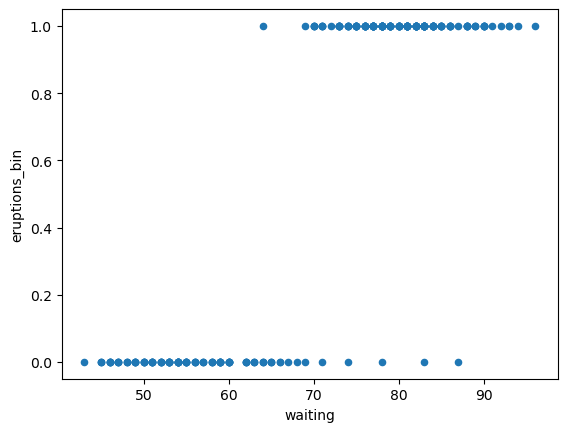

In [ ]:
## Plotando os gráficos    
faithful.plot.scatter(x='waiting',
                      y='eruptions_bin')    

De agora em diante, vamos usar como eixo Y essas variáveis binarizadas:

In [ ]:
y = torch.tensor(faithful.eruptions_bin.values, dtype = torch.float)
x = torch.tensor(faithful.waiting.values, dtype = torch.float)

In [ ]:
## Vamos usar apenas uma função y = ax + b, então
## não precisamos mudar muito o valor de x, apenas
## normalizaremos.

maximo = x.max(axis = 0).values
xx = x.unsqueeze(-1) / maximo

In [ ]:
xx

tensor([[0.8229],
        [0.5625],
        [0.7708],
        [0.6458],
        [0.8854],
        [0.5729],
        [0.9167],
        [0.8854],
        [0.5312],
        [0.8854],
        [0.5625],
        [0.8750],
        [0.8125],
        [0.4896],
        [0.8646],
        [0.5417],
        [0.6458],
        [0.8750],
        [0.5417],
        [0.8229],
        [0.5312],
        [0.4896],
        [0.8125],
        [0.7188],
        [0.7708],
        [0.8646],
        [0.5729],
        [0.7917],
        [0.8125],
        [0.8229],
        [0.7604],
        [0.8021],
        [0.6875],
        [0.8333],
        [0.7708],
        [0.5417],
        [0.5000],
        [0.8333],
        [0.6146],
        [0.9375],
        [0.8333],
        [0.6042],
        [0.8750],
        [0.6042],
        [0.7604],
        [0.8646],
        [0.6667],
        [0.5521],
        [0.8542],
        [0.6146],
        [0.7812],
        [0.9375],
        [0.5625],
        [0.8333],
        [0.5625],
        [0

## Função Sigmóide

Note que criar um oráculo baseado em uma reta nesse conjunto de pontos seria bastante contra-intuitivo, dado que o valor do oráculo não teria relação nenhuma com os valores $0$s e $1$s em si. 

O que nós precisamos, é de uma função que possa ser interpretada como uma probabilidade. Em outras palavras, nós precisamos que o retorno do oráculo seja um valor $V$ que possa ser lido como $Pr(y = 1) = V$. Usaremos para isso a função sigmóide que estudamos na Atividade 02 dada pela seguinte equação: 

$$f(x) = \frac{1}{1 + e^{-g(x)}}$$

Nesta equação, $g(x)$ pode ser visto como o resultado de uma Regressão Linear. Em outras palavras, faremos $g(x) = ax + b$.

O formato da função pode ser visto no gráfico a seguir.

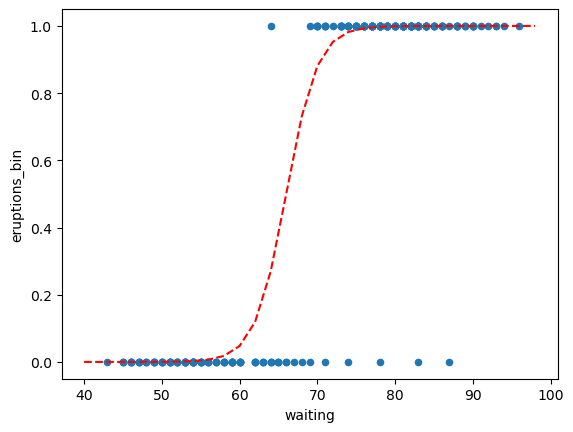

In [ ]:
## Plotando os gráficos    
faithful.plot.scatter(x='waiting',
                      y='eruptions_bin')    

# Gerando eixo_x
eixo_x = torch.tensor(range(40,100,2))

# Gerando eixo_y
g    = lambda x : x/2 - 33 
sigm = lambda x : 1 / (1 + torch.exp(-g(x)))

eixo_y = sigm(eixo_x)

plt.plot(eixo_x.tolist(), eixo_y.tolist(), 'r--')

Um classificador de aprendizado de máquina ajustaria a função sigmóide e, posteriormente, escolheria um threshold interpretando o resultado da função logística como uma probabilidade. Nesse caso, poderíamos prever que o resultado final seria **1** se a probabilidade (resultado da função sigmóide) de ser **1** for maior do que **50%**. Nesse caso, o limiar seria o **0.50**.

Por exemplo, no ponto $x = 60$ teríamos:

In [ ]:
sigm(torch.tensor(60))

tensor(0.0474)

A curva sigmóide devolveu $0.04$, em outras palavras, interpretaremos que a $Pr(y = 1) = 4\%$ para esta instância específica.

Escolheremos agora o ponto $65$.

In [ ]:
sigm(torch.tensor(65))

tensor(0.3775)

Agora $Pr(y = 1) = 37.7\%$. Vamos tentar agora $x = 70$.

In [ ]:
sigm(torch.tensor(70))

tensor(0.8808)

Agora a probabilidade $Pr(y = 1) = 88\%$. Nesse caso, temos um forte indício de que o rótulo marcado no banco de dados deve ser realmente 1, podendo então fazer uma escolha neste sentido.

## A Entropia Cruzada Binária

Vimos anteriormente que existe uma função chamada de *entropia cruzada binária* dada pela fórmula:

$$ -\frac{1}{n} \sum_{i=1}^n [y_i  \log(\hat y_i) + (1-y_i)  \log(1-\hat y_i) ]$$ 

Vamos agora entender porque esta função pode ser usada como uma função de custo para medir erros na predição $\hat y_i$ de variáveis $y_i$, dado que $y_i \in \{0, 1\}$. Posteriormente, mostraremos que esta função de custo é superior ao *erro quadrático médio* em problemas de regressão logística.

Para início de conversa, devemos notar que dentro do somatório existem dois termos que se somam, sendo que um deles será sempre anulado. Isso ocorre porque:

1. Se $y_i = 0$, então o primeiro termo será anulado por multiplicar com $y_i$.
2. Se $y_i = 1$, então o segundo termo será anulado por multiplicar com $(1-y_i)$.

Dessa forma, os multiplicadores $y_i$ e $(1-y_i)$ só existem para dizer qual termo será utilizado, então partiremos para o segundo elemento dentro de cada termo, o fator de $\log$. O logaritmando usado é um elemento entre zero e um, dado que este é o intervalo da função sigmóide aplicada na saída da regressão logística, então vale a pena lembrar como a função logaritmo se comporta nesse intervalo. 

tensor([   -inf, -4.5951, -3.9020, -3.4965, -3.2088, -2.9857, -2.8034, -2.6492,
        -2.5157, -2.3979, -2.2925, -2.1972, -2.1102, -2.0302, -1.9561, -1.8871,
        -1.8225, -1.7619, -1.7047, -1.6507, -1.5994, -1.5506, -1.5041, -1.4596,
        -1.4171, -1.3762, -1.3370, -1.2993, -1.2629, -1.2278, -1.1939, -1.1611,
        -1.1294, -1.0986, -1.0688, -1.0398, -1.0116, -0.9842, -0.9575, -0.9316,
        -0.9062, -0.8815, -0.8575, -0.8339, -0.8109, -0.7885, -0.7665, -0.7450,
        -0.7239, -0.7033, -0.6831, -0.6633, -0.6439, -0.6248, -0.6061, -0.5878,
        -0.5698, -0.5521, -0.5347, -0.5176, -0.5008, -0.4842, -0.4680, -0.4520,
        -0.4362, -0.4207, -0.4055, -0.3904, -0.3756, -0.3610, -0.3466, -0.3324,
        -0.3185, -0.3047, -0.2911, -0.2776, -0.2644, -0.2513, -0.2384, -0.2257,
        -0.2131, -0.2007, -0.1884, -0.1763, -0.1643, -0.1525, -0.1408, -0.1292,
        -0.1178, -0.1065, -0.0953, -0.0843, -0.0733, -0.0625, -0.0518, -0.0412,
        -0.0308, -0.0204, -0.0102,  0.00

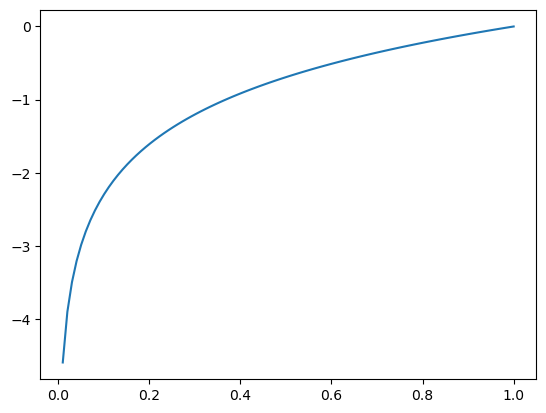

In [ ]:
eixo_x = torch.linspace(0, 1, steps = 100)
eixo_y = torch.log(eixo_x)

plt.plot(eixo_x.tolist(), eixo_y.tolist())

eixo_y

Pelo gráfico, notamos que:

1. O logaritmo é negativo.
2. Quando o logaritmando se aproxima de $1$, o logaritmo se aproxima de $0$.
3. Quando o logaritmando se aproxima de $0$, o logaritmo se aproxima de $-\infty$.

Vamos analisar agora o primeiro termo  $y_i  \log(\hat y_i)$, que só é válido quando $y_i = 1$. É fácil notar que:

1. Se $\hat y_i$ for algo muito próximo de $1$, ou seja, $\hat y_i$ está tendo sucesso ao prever $i$, então $\log(\hat y_i)$ se aproximará de zero, fazendo com que o retorno da entropia cruzada seja muito próximo de zero pelo lado negativo. Em outras palavras, se $\hat y_i \approx 1$, o erro indicado pela validação cruzada é aproximadamente zero.
2. Se $\hat y_i$ for algo muito próximo de $0$, ou seja, $\hat y_i$ falha em prever $i$, então $\log(\hat y_i)$ se aproximará de $-\infty$, o que indica que o erro está muito longe do ideal.

Vale observar que tanto no caso 1, quanto no caso 2, a resposta será negativa, mas uma função de erro tem que ser positiva, sendo que erros muito altos indicam predições muito incorretas. Por conta disso, a fórmula da entropia cruzada binária tem um $-$ no início, garanta que não deixou passar este detalhe olhando a seguir.

$$ -\frac{1}{n} \sum_{i=1}^n [y_i  \log(\hat y_i) + (1-y_i)  \log(1-\hat y_i) ]$$

Vamos analisar agora o termo $(1-y_i)  \log(1-\hat y_i)$, que só é válido quando $y_i = 0$. É fácil notar que:

1.  Se $\hat y_i$ for algo muito próximo de $0$, ou seja, $\hat y_i$ está tendo sucesso ao prever $i$, então $\log(1 - \hat y_i)$ se aproximará de zero, dado que $1 - \hat y_i \approx 1$, fazendo com que o retorno da entropia cruzada seja  muito próximo de zero pelo lado negativo. Em outras palavras, se $\hat y_i \approx 0$, o erro indicado pela validação cruzada é aproximadamente zero.
2. Se $\hat y_i$ for algo muito próximo de $1$, ou seja, $\hat y_i$ falha em prever $i$, então $\log(1 - \hat y_i)$ se aproximará de $-\infty$, dado que $1 - \hat y_i \approx 0$, o que indica que o erro está muito longe do ideal.

Novamente, vale observar que ambos os casos possuem resposta negativa e novamente o valor será positivado pelo sinal de $-$ no início da entropia cruzada.

Uma grande vantagem da *entropia cruzada* sobre o *erro quadrático médio* é que neste cenário binário o valor de erro vai de $0 .. \infty$, enquanto que o valor do *erro quadrático médio* não passará de um. Por exemplo, vamos comparar as duas:

In [ ]:
erro_entropia_cruzada = torch.nn.BCELoss()
erro_quadratico_medio = torch.nn.MSELoss()

print("y, y_pred, BCE, MSE")
for i in [0.0,1.0] :
    y_real = torch.tensor([i])
    for j in range(10) :
        y_pred = torch.tensor([j/10])
        bce = erro_entropia_cruzada(y_pred, y_real)
        mse = erro_quadratico_medio(y_pred, y_real)
        print(i, j/10,bce.item(),mse.item())

y, y_pred, BCE, MSE
0.0 0.0 0.0 0.0
0.0 0.1 0.10536051541566849 0.010000000707805157
0.0 0.2 0.2231435477733612 0.04000000283122063
0.0 0.3 0.3566749691963196 0.09000000357627869
0.0 0.4 0.5108256340026855 0.1600000113248825
0.0 0.5 0.6931471824645996 0.25
0.0 0.6 0.916290819644928 0.36000001430511475
0.0 0.7 1.2039728164672852 0.4899999797344208
0.0 0.8 1.6094379425048828 0.64000004529953
0.0 0.9 2.3025848865509033 0.809999942779541
1.0 0.0 100.0 1.0
1.0 0.1 2.3025851249694824 0.809999942779541
1.0 0.2 1.6094379425048828 0.64000004529953
1.0 0.3 1.2039728164672852 0.4899999797344208
1.0 0.4 0.9162907004356384 0.36000001430511475
1.0 0.5 0.6931471824645996 0.25
1.0 0.6 0.5108255743980408 0.15999998152256012
1.0 0.7 0.3566749691963196 0.09000000357627869
1.0 0.8 0.2231435328722 0.03999999538064003
1.0 0.9 0.10536054521799088 0.010000004433095455


Resumindo o que aprendemos, uma função de custo deve ser capaz de penalizar o modelo em caso de previsões erradas, gerando um valor de erro mais alto que resultará em um valor de gradiente mais alto. Entretanto, o erro quadrático médio não penaliza muito o modelo em um cenário da regressão logística. Idealmente, MSELoss deveria ser alto para previsões de classes erradas, mas isso não acontece, porque a regressão logística é usada para classificação e todos os valores de probabilidade  estão entre 0 e 1.

Digamos que em um problema de classificação binária seu modelo prevê para uma resposta que deveria ser 1 uma probabilidade de $0.1$ (este é um exemplo claro de erro de classificação).


Idealmente, para uma boa função de custo, o valor de penalização/erro deve ser alto, mas a MSELoss devolve $0.81$ como erro, algo muito menor do que a BCELoss que devolve $2.30$.

Apesar da classificação incorreta, a MSELoss está penalizando o modelo com um valor menor em comparação com a BCELoss.

## Aprofundando sobre a Função de Custo na Convergência

Estudamos na seção anterior que  a função de custo *error quadrático médio* não parece ser superior à *entropia cruzada* por devolver valores de erro muito baixos para respostas notadamente incorretas. Nesta seção, vamos fornecer subsídios que reforçam ainda mais a ideia de que o *erro quadrátio médio* não é uma boa escolha. Vamos mostrar nesta seção apenas gráficos e exemplos e deixaremos para você a tarefa de interpretar os gráficos e convencer a si mesmo sobre os cenários que estão acontecendo.

A seguir vamos plotar um gráfico da curva de erro em que o valor de $b$ foi fixado em $-15$ e o valor de $a$ será alterado de forma exaustiva no intervalo de 0 a 40. nesse caso, o erro se refere à variação nesse $a$.

Vamos usar a função **MSELoss** já disponível no PyTorch para computar o erro.

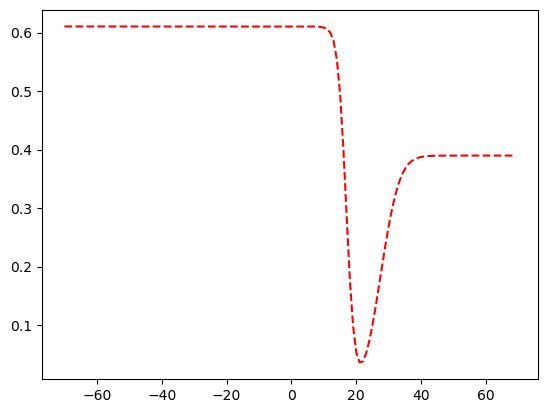

In [ ]:
eixo_erro = []
eixo_a    = []
b = -15

loss_fn = torch.nn.MSELoss()

## Variações propostas em a = [0 a 40].
for a in range(-70,70) :
    y_pred = 1 / (1 + torch.exp(-(a*xx+b)))
    loss = loss_fn(y_pred.flatten(), y)

    eixo_a.append(a)
    eixo_erro.append(loss.item())


# Vamos agora plotar a curva de erro e analisar o resultados:
plt.plot(eixo_a, eixo_erro, 'r--', label='Erros')

Vamos agora usar a *entropia cruzada binária*. Veja como essa função de custo se comporta ao variarmos $a$ no mesmo intervalo anterior.

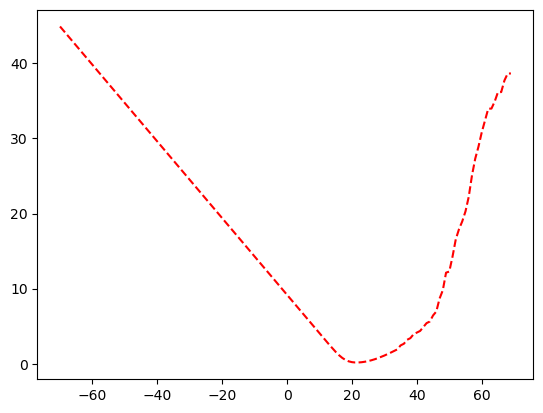

In [ ]:
eixo_erro = []
eixo_a    = []
b = -15

loss_fn = torch.nn.BCELoss()

## Variações propostas em a = [0 a 40].
for a in range(-70,70) :
    y_pred = 1 / (1 + torch.exp(-(a*xx+b)))
    loss = loss_fn(y_pred.flatten(), y)

    eixo_a.append(a)
    eixo_erro.append(loss.item())


# Vamos agora plotar a curva de erro e analisar o resultados:
plt.plot(eixo_a, eixo_erro, 'r--', label='Erros')

**Exercício**

Agora pense e responda as seguintes perguntas:

1. O ponto mínimo poderia ser encontrado no *erro quadrático médio* saindo de $a = 50$, por exemplo?
2. O ponto mínimo poderia ser encontrado na *entropia cruzada* saindo de $a = 50$, por exemplo?
3. A entropia cruzada, segundo o gráfico acima, favorece a convergência em relação ao erro quadrático médio?

Vamos agora expandir o exemplo um pouco mais para deixar o valor de $b$ livre:

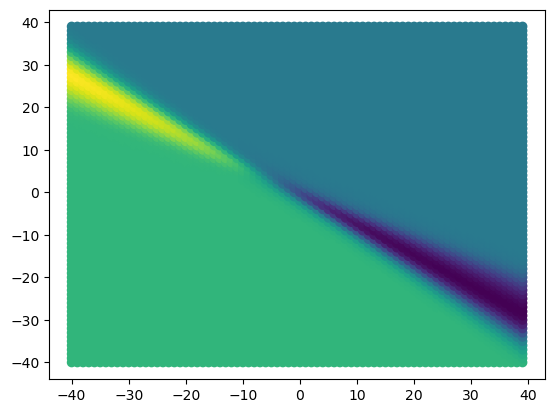

In [ ]:
eixo_erro = []
eixo_a    = []
eixo_b    = []

loss_fn = torch.nn.MSELoss()

## Variações propostas em a = [0 a 40].
for a in range(-40,40) :
    for b in range(-40, 40) :
        y_pred = 1 / (1 + torch.exp(-(a*xx+b)))
        loss = loss_fn(y_pred.flatten(), y)

        eixo_a.append(a)
        eixo_b.append(b)
        eixo_erro.append(loss.item())


# Vamos agora plotar a curva de erro e analisar o resultados:
plt.scatter(x = eixo_a, y = eixo_b, c = eixo_erro, cmap = "viridis", norm = 'symlog')

## Veja o link a seguir para entender as opções de norm
#### https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/scale.py#L694-L696

## Veja o link a seguir para entender as cores de viridis
#### https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html

**Exercício**

Pense novamente, você acha que esta função de custo é boa? Você acha que a descida do gradiente conseguiria convergir para uma situação de erro mínimo independente do ponto de partida?


A seguir, vamos plotar o gráfico da entropia cruzada nos mesmos intervalos de $a$ e $b$ acima pesquisados.

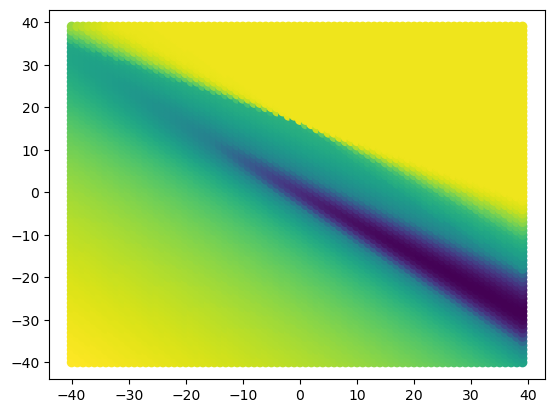

In [ ]:
eixo_erro = []
eixo_a    = []
eixo_b    = []

loss_fn = torch.nn.BCELoss()

## Variações propostas em a = [0 a 40].
for a in range(-40,40) :
    for b in range(-40, 40) :
        y_pred = 1 / (1 + torch.exp(-(a*xx+b)))
        loss = loss_fn(y_pred.flatten(), y)

        eixo_a.append(a)
        eixo_b.append(b)
        eixo_erro.append(loss.item())


# Vamos agora plotar a curva de erro e analisar o resultados:
plt.scatter(x = eixo_a, y = eixo_b, c = eixo_erro, cmap = "viridis", norm = 'symlog')

**Exercício**

Agora pense e responda: **a entropia cruzada, segundo o gráfico acima, favorece a convergência em relação ao erro quadrático médio?**

## Descida do Gradiente com Regressão Logística

Note que estamos interpretando a regressão logística da seguinte forma: 

**A regressão logística é igual à regressão linear, mas com uma função sigmóide aplicada ao final do resultado**.

Além disso, se você analisou bem a seção anterior, deve ter percebido que a entropia cruzada binária é uma opção melhor do que o erro quadrático médio. Não estamos dizendo aqui que o erro quadrático médio jamais convergeria. Na verdade, para este nosso exemplo mostrado neste notebook, o erro quadrático médio forneceria um resultado similar ao da entropia cruzada, só  precisando de mais épocas. 

Entretanto, a função de custo entropia cruzada é mais apropriada tanto pela análise que você próprio conduziu na seção anterior, quanto por outros motivos mais técnicos que fogem ao escopo deste notebook.

Para treinar a regressão logística, vamos primeiro definir o $a$ e $b$ que serão os únicos parâmetros a serem treinados. Lembrando que a equação que treinaremos será:

$$f(x) = \frac{1}{1 + e^{- (a \times x + b) }}$$



In [ ]:
## As variáveis a, b de ax+b estão a seguir
## inicializado ao acaso
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

Vamos agora configurar a função de custo *entropia cruzada binária*.

In [ ]:
## Configurando a loss
loss_fn = torch.nn.BCELoss()

Vamos executar um conjunto de 10000 épocas. Além disso, seguiremos um esquema em que a taxa de aprendizado começará bem alta ($0.5$) e irá decrescer 10 vezes no decorrer do treinamento.

No código a seguir, preste atenção no modo como a predição é feita, simplesmente aplicando a função da regressão logística. Além disso,  preste atenção na computação das derivadas com **backward** e na atualização dos pesos, feita simplesmente sutraindo pela derivada multiplicada pela taxa de aprendizado..

In [ ]:
# Configurando a taxa de aprendizado.
# Vamos deixar um valor alto como sendo
# o máximo que a taxa de aprendizado
# pode receber. Daí, vamos construir
# a taxa dentro do laço
max_learning_rate = 0.5

epochs = 10000
for t in range(epochs):

    # Gerando taxa de aprendizado.
    learning_rate = max_learning_rate * (1 - t/epochs)
    
    # Forward pass: colocaremos a função logística diretamente
    y_pred = 1 / (1 + torch.exp(-(a*xx+b)))

    # Computa e imprime o erro. Passamos tensores contendo os valores preditos e
    # os valores reais e a loss retorna um tensor contendo o erro.
    loss = loss_fn(y_pred.flatten(), y)
    
    ## Imprimindo dez vezes a loss
    if t % (epochs / 10) == 0 :
        print(t, loss.item())
    #print(y_pred)

    # Backward pass:  computar o gradiente da loss em relação a todos os
    # coeficientes a serem aprendidos no modelo.
    loss.backward()

    # Atualizar os pesos usando a descida por gradiente, como fizemos anteriormente.
    # Cada parâmetro é um Tensor,então podemos acessar seus gradientes como
    # fizemos antes.
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Limpamos os gradientes antes da próxima iteração
    a.grad.data.zero_()
    b.grad.data.zero_()


0 0.6649953126907349
1000 0.27161359786987305
2000 0.20812256634235382
3000 0.18382325768470764
4000 0.17133641242980957
5000 0.16397899389266968
6000 0.15934011340141296
7000 0.15635058283805847
8000 0.1544778048992157
9000 0.15344388782978058


Vamos plotar o gráfico do nosso oráculo.

tensor([22.0346], requires_grad=True) tensor([-15.4885], requires_grad=True)


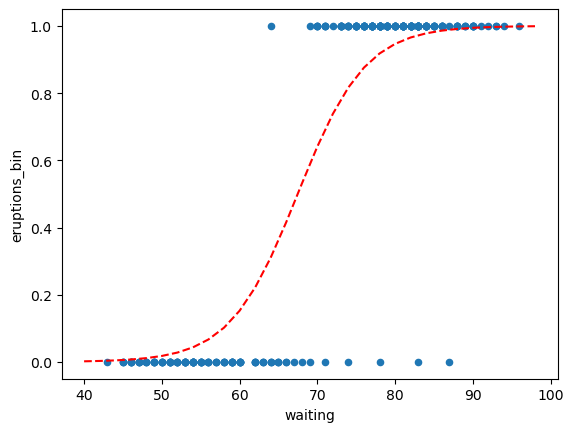

In [ ]:
## Plotando os gráficos    
faithful.plot.scatter(x='waiting',
                      y='eruptions_bin')    

# Gerando eixo_x
eixo_x = torch.tensor(range(40,100,2))

## Obtendo o eixo_y para esses valores
eixo_y = 1 / (1 + torch.exp(-(a*eixo_x/maximo+b)))

## Plotando a reta    
plt.plot(eixo_x.tolist(), eixo_y.tolist(), 'r--', label='Valores Obtidos')

print(a,b)

## Recaptulando

Nesta aula, aprendemos a utilizar o PyTorch, uma biblioteca que nos ajudará muito no propósito de escrever oráculos. O PyTorch nos fornece duas funcionalidades principais.

1. Uma estrutura de dados Tensor que permite agrupar os dados de maneira eficiente e melhora a legibilidade do código, dado que podemos escrever funções menores e com menos laços de repetição.

2. Um mecanismo para computar as derivadas automaticamente (autograd). 

Também avançamos no conhecimento teóricos sobre construção de oráculos com a adição em nosso arsenal da regressão logística, que difere da regressão linear nos seguintes aspectos:

1. A regressão logística permite obter oráculos quando o que queremos obter são dados categóricos. No exemplo da aula, os nossos dados eram binários, mas podemos ampliar esse conceito para qualquer quantidade de classes.

2. A regressão logística aplica uma função sigmóide na saída da rede, cujo resultado está no intervalo $[0..1]$ e pode ser interpretado como uma probabilidade.

3. A regressão logística usa como função de custo a entropia cruzada, mais adaptada para esta estratégia.